## Wine Data Visualization ##

I downloaded the wine data set from the [UCI machine learning data repository](https://archive.ics.uci.edu/ml/datasets/Wine).  This dataset is the result of chemical analysis of wines grown in a region of Italy but produced by three different cultivars (manmade plant varieties).  There are 13 chemical quality attributes provided in the data for use in classifying the cultivar of the wine.  

The attributes of the wine follow:

1. Alcohol
2. Malic Acid
3. Ash
4. Alkalinity of the soil
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color Intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

Each of these chemical attributes of the wine cultivars are continuous data.

Due to the large number of attributes, I decided to concentrate on a few seemingly highly relevant inputs such as alcohol content, malic acid and phenols. I used alcohol as a natural choice but malic acid was randomly chosen.  After a little research on wine chemistry, I decided to include total phenols to improve classification.  

### Import Libraries ###

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

### Import Data ###

In [41]:
df = pd.read_csv('wine.data')
df.columns = ['cultivar', 'alcohol', 'malic_acid', 'ash', 'alkalinity','magnesium','phenols', 'flavanoids',
              'nonflav_phenols', 'proanthocyanins','color','hue','OD280/OD315', 'proline']

Let's take a look at the top of the dataframe.

In [42]:
print(df.head())

   cultivar  alcohol  malic_acid   ash  alkalinity  magnesium  phenols  \
0         1    13.20        1.78  2.14        11.2        100     2.65   
1         1    13.16        2.36  2.67        18.6        101     2.80   
2         1    14.37        1.95  2.50        16.8        113     3.85   
3         1    13.24        2.59  2.87        21.0        118     2.80   
4         1    14.20        1.76  2.45        15.2        112     3.27   

   flavanoids  nonflav_phenols  proanthocyanins  color   hue  OD280/OD315  \
0        2.76             0.26             1.28   4.38  1.05         3.40   
1        3.24             0.30             2.81   5.68  1.03         3.17   
2        3.49             0.24             2.18   7.80  0.86         3.45   
3        2.69             0.39             1.82   4.32  1.04         2.93   
4        3.39             0.34             1.97   6.75  1.05         2.85   

   proline  
0     1050  
1     1185  
2     1480  
3      735  
4     1450  


Let's investigate the alcohol content of the wine with a boxplot and a histogram.

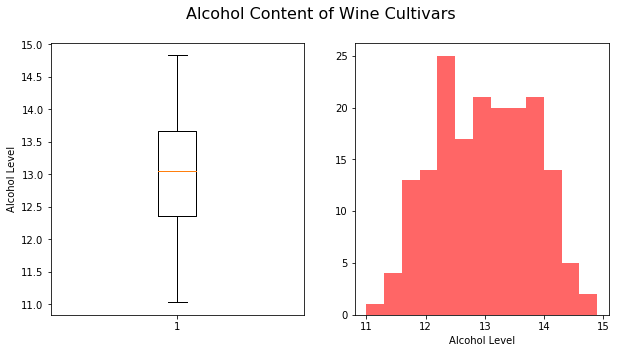

In [52]:
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.boxplot(df['alcohol'])
plt.ylabel('Alcohol Level')


plt.subplot(1, 2, 2)
plt.hist(df['alcohol'], color='red', bins=np.arange(11, 15, .3), alpha=.6)
plt.xlabel('Alcohol Level')


plt.suptitle('Alcohol Content of Wine Cultivars', fontsize=16)
plt.show()

The interquartile range of the data varies tightly between 12.5 and 13.5.  From the histogram, we can see a possible
multimodal structure in alcohol content.  Further investigation is definitely warranted in order to see if alcohol by itself
can discriminate between the wine cultivars.

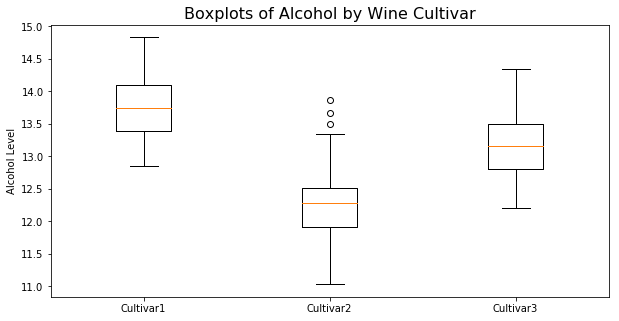

In [50]:
plt.figure(figsize=(10, 5)) 
cultivar1 = df[df['cultivar'] == 1]['alcohol']
cultivar2 = df[df['cultivar'] == 2]['alcohol']
cultivar3 = df[df['cultivar'] == 3]['alcohol']
alcohol_data = [cultivar1, cultivar2, cultivar3]
plt.boxplot(alcohol_data)
plt.title('Boxplots of Alcohol by Wine Cultivar', fontsize=16)
plt.ylabel('Alcohol Level')
plt.xticks([1,2,3],['Cultivar1', 'Cultivar2', 'Cultivar3'])
plt.show()

Cultivar1 tends to have very high alcohol content.  Cultivar2 has it's interquartile range around 12 which is the lowest among the cultivars.  Cultivar2 tends to be skewed to high alcohol values and has several outliers.  Cultivar3 has a medium level of alcohol centered around 13.0. Alcohol content is probably not the best discriminator of the available attributes but it is a decent first guess.

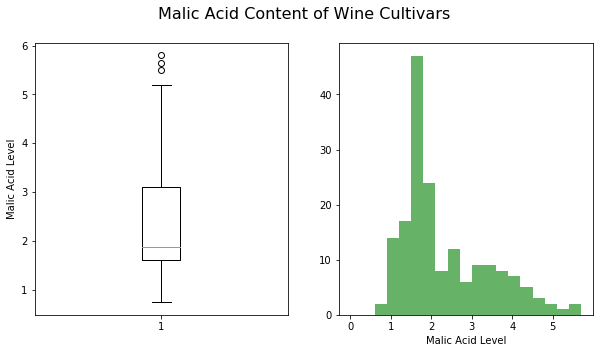

In [45]:
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.boxplot(df['malic_acid'])
plt.ylabel('Malic Acid Level')


plt.subplot(1, 2, 2)
plt.hist(df['malic_acid'], color='green', bins=np.arange(0, 6, .3), alpha=.6)
plt.xlabel('Malic Acid Level')


plt.suptitle('Malic Acid Content of Wine Cultivars', fontsize=16)
plt.show()

Malic acid levels are skewed to the right.  The IQR is tight around the 2 to 3 level but there exist levels well above 5.  Now we can analyze how malic acid varies with the cultivar.

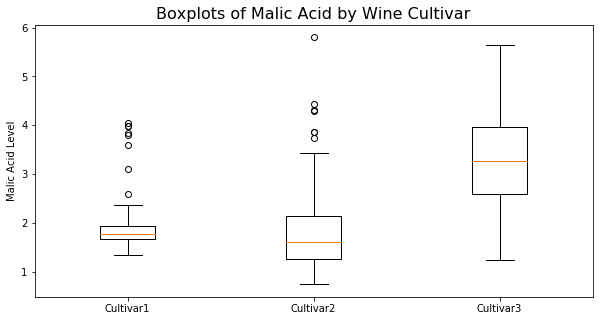

In [60]:
plt.figure(figsize=(10, 5)) 
cultivar1 = df[df['cultivar'] == 1]['malic_acid']
cultivar2 = df[df['cultivar'] == 2]['malic_acid']
cultivar3 = df[df['cultivar'] == 3]['malic_acid']
malic_data = [cultivar1, cultivar2, cultivar3]
plt.boxplot(malic_data)
plt.title('Boxplots of Malic Acid by Wine Cultivar', fontsize=16)
plt.ylabel('Malic Acid Level')
plt.xticks([1,2,3],['Cultivar1', 'Cultivar2', 'Cultivar3'])
plt.show()

Cultivar1 has an extremly tight range with most values between 1.75 and 2.0.  Cultivar2 also has low levels of malic acid but the range is larger than in cultivar1.  Cultivar3 has the highest levels of malic acid and a broadest distribution of values with the highest quartile having values above 4.  It is not completely clear from this plot is malic acid will allow us to easily classify the cultivars.  

Now let's see if we can find any clusters of the wine cultivars using the alcohol and malic acid information.

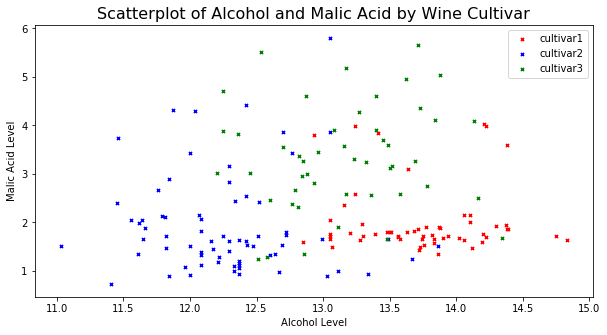

In [57]:
plt.figure(figsize=(10, 5)) 
m1 = df[df['cultivar'] == 1]['malic_acid']
m2 = df[df['cultivar'] == 2]['malic_acid']
m3 = df[df['cultivar'] == 3]['malic_acid']
a1 = df[df['cultivar'] == 1]['alcohol']
a2 = df[df['cultivar'] == 2]['alcohol']
a3 = df[df['cultivar'] == 3]['alcohol']

plt.scatter(
    x=a1,
    y=m1,
    color='r',
    label='cultivar1',
    marker='x', s=10)

plt.scatter(
    x=a2,
    y=m2,
    color='b',
    label='cultivar2',
    marker='x', s=10
)

plt.scatter(
    x=a3,
    y=m3,
    color='g',
    label='cultivar3',
    marker='x', s=10
)

plt.legend()
plt.title('Scatterplot of Alcohol and Malic Acid by Wine Cultivar', fontsize=16)
plt.ylabel('Malic Acid Level')
plt.xlabel('Alcohol Level')
plt.show()

We now can visualize the relationship of alcohol and malic acid against the three cultivar classes.  Cultivar1 tends to have high levels of alcohol combined with low levels of malic acid.  Cultivar2 has low (< 13.0) levels of alcohol along with low levels of malic acid.  Cultivar3 tends to have high levels of malic acid with a broad range of alcohol levels.  There are numerous outliers of the other cultivars in the central cluster of cultivar3.  There is likely to be another attribute we can used to better classify the wine.

I chose to look at total phenol content. Phenols are aromatic compounds produced by plants and should be directly related to differences in the taste of the wine.

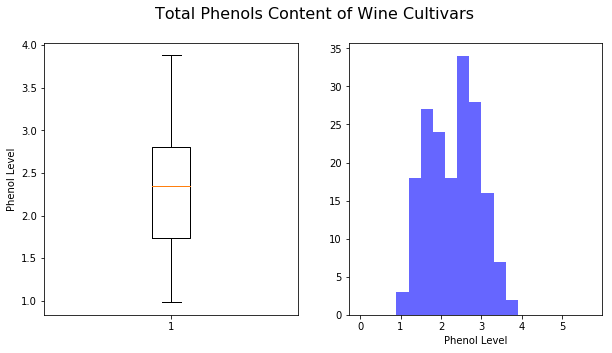

In [66]:
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.boxplot(df['phenols'])
plt.ylabel('Phenol Level')


plt.subplot(1, 2, 2)
plt.hist(df['phenols'], color='blue', bins=np.arange(0, 6, .3), alpha=.6)
plt.xlabel('Phenol Level')


plt.suptitle('Total Phenols Content of Wine Cultivars', fontsize=16)
plt.show()

Total phenols range from a low of 1.0 to a high of almost 4.0.  
There is a bimodal appearance to the histogram and the IQR is found between 2.0 and 3.

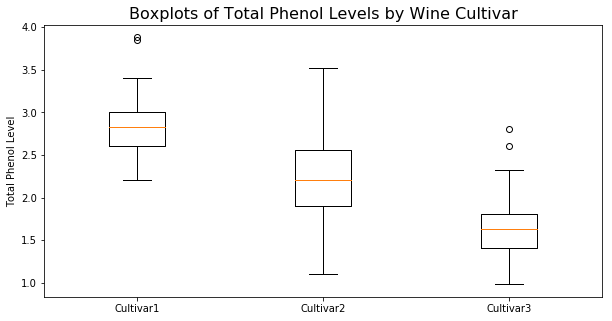

In [67]:
plt.figure(figsize=(10, 5)) 
cultivar1 = df[df['cultivar'] == 1]['phenols']
cultivar2 = df[df['cultivar'] == 2]['phenols']
cultivar3 = df[df['cultivar'] == 3]['phenols']
malic_data = [cultivar1, cultivar2, cultivar3]
plt.boxplot(malic_data)
plt.title('Boxplots of Total Phenol Levels by Wine Cultivar', fontsize=16)
plt.ylabel('Total Phenol Level')
plt.xticks([1,2,3],['Cultivar1', 'Cultivar2', 'Cultivar3'])
plt.show()

We see a nice trend in total phenol levels between the cultivars.  Cultivar1 has the highest median around 3.0 while cultivar2 has a lower level of the IQR between 2.0 and 2.5.  Cultivar3 has the lowest level of phenols centered around 1.5.  The IQRs do not overlap which should improve their ability to discriminate between the wines.

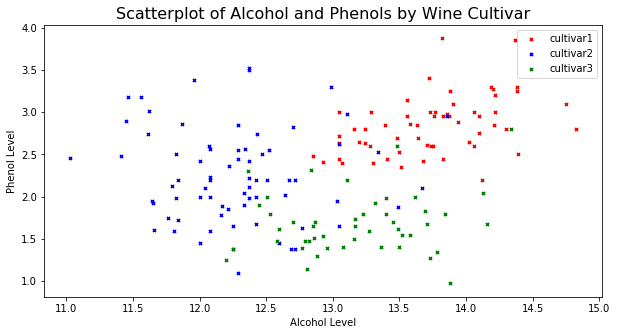

In [68]:
plt.figure(figsize=(10, 5)) 
p1 = df[df['cultivar'] == 1]['phenols']
p2 = df[df['cultivar'] == 2]['phenols']
p3 = df[df['cultivar'] == 3]['phenols']
a1 = df[df['cultivar'] == 1]['alcohol']
a2 = df[df['cultivar'] == 2]['alcohol']
a3 = df[df['cultivar'] == 3]['alcohol']

plt.scatter(
    x=a1,
    y=p1,
    color='r',
    label='cultivar1',
    marker='x', s=10)

plt.scatter(
    x=a2,
    y=p2,
    color='b',
    label='cultivar2',
    marker='x', s=10
)

plt.scatter(
    x=a3,
    y=p3,
    color='g',
    label='cultivar3',
    marker='x', s=10
)

plt.legend()
plt.title('Scatterplot of Alcohol and Phenols by Wine Cultivar', fontsize=16)
plt.ylabel('Phenol Level')
plt.xlabel('Alcohol Level')
plt.show()

Overall, a much cleaner appearance in the scatterplot of alcohol and total phenols by cultivar.  Cultivar3 is clearly found with high alcohol and low phenol levels.  Cultivar1 is found in the upper right quadrant (high alcohol and high phenol).  Cultivar2 dominates in the left half of the chart. There are a few outliers that would lead to misclassification but the clusters are much better formed than with malic acid.  It is clear that a classifier using only a few of the given attributes should be able to differentiate the wine cultivars easily.